<a href="https://colab.research.google.com/github/naufalnashif/m5-mlbb-data/blob/main/Scraping_M5_Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining M5 Championship MLBB 2023

## Import Dependencies

In [ ]:
import requests
from bs4 import BeautifulSoup
import random
import pandas as pd

## Scraping Hero Stat from M5 Website

In [ ]:
def scrape_mobile_legends_data(url):
    data = []

    try:
        user_agents = [
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36 Edge/17.17134",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.1.2 Safari/605.1.15",
        ]

        # Mendapatkan User-Agent acak
        random_user_agent = random.choice(user_agents)

        # Menggunakan User-Agent dalam permintaan HTTP
        headers = {
            "User-Agent": random_user_agent,
            "Accept-Language": "en-US,en;q=0.5"
        }
        timeout = 10
        response = requests.get(url, headers=headers, timeout=timeout)
        soup = BeautifulSoup(response.content, 'html.parser')

        table = soup.find('table', class_='datatable')
        if not table:
            print("Table not found on the page.")
            return data

        rows = table.find_all('tr')[1:]  # Skip the header row

        for row in rows:
            columns = row.find_all('td')
            hero_img = columns[0].find('img')['src']
            hero = columns[0].find('h4').text
            pick = columns[1].text
            pick_rate = columns[2].text
            ban = columns[3].text
            ban_rate = columns[4].text
            win_rate = columns[5].text
            avg_kda = columns[6].text
            avg_kill = columns[7].text
            avg_death = columns[8].text
            avg_assist = columns[9].text

            data.append({
                'Hero Img' : hero_img,
                'Hero': hero,
                'Pick': pick,
                'Pick Rate': pick_rate,
                'Ban': ban,
                'Ban Rate': ban_rate,
                'Win Rate': win_rate,
                'Average KDA': avg_kda,
                'Average Kill': avg_kill,
                'Average Death': avg_death,
                'Average Assist': avg_assist
            })

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

    return data

# Example usage:
url = "https://m5.mobilelegends.com/statistic-m5-main-stage?type=&stat=hero"
result_hero = scrape_mobile_legends_data(url)
df_hero = pd.DataFrame(result_hero)

In [ ]:
df_hero

,Hero Img,Hero,Pick,Pick Rate,Ban,Ban Rate,Win Rate,Average KDA,Average Kill,Average Death,Average Assist
0,https://m5.mobilelegends.com/cfind/convert/web...,Harith,3,3%,1,1%,100%,6.33,3.33,0.67,3.00
1,https://m5.mobilelegends.com/cfind/convert/web...,Gusion,2,2%,0,0%,100%,9.50,7.00,0.50,2.50
2,https://m5.mobilelegends.com/cfind/convert/web...,Rafaela,7,6%,1,1%,86%,7.36,0.43,1.29,9.00
3,https://m5.mobilelegends.com/cfind/convert/web...,Gloo,5,4%,2,2%,80%,4.37,1.00,2.40,8.00
4,https://m5.mobilelegends.com/cfind/convert/web...,Nolan,22,19%,92,80%,77%,7.16,3.68,1.09,5.41
...,...,...,...,...,...,...,...,...,...,...,...
58,https://m5.mobilelegends.com/cfind/convert/web...,Lunox,1,1%,0,0%,0%,0.00,0.00,1.00,0.00
59,https://m5.mobilelegends.com/cfind/convert/web...,Luo Yi,1,1%,0,0%,0%,4.00,1.00,2.00,7.00
60,https://m5.mobilelegends.com/cfind/convert/web...,Esmeralda,0,0%,1,1%,0%,0.00,0.00,0.00,0.00
61,https://m5.mobilelegends.com/cfind/convert/web...,Minsitthar,0,0%,1,1%,0%,0.00,0.00,0.00,0.00


## Scraping Player Stat From M5 Website

In [ ]:
def scrape_player_data(url):
    data = []

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
            "Accept-Language": "en-US,en;q=0.5"
        }
        timeout = 10
        response = requests.get(url, headers=headers, timeout=timeout)
        soup = BeautifulSoup(response.content, 'html.parser')

        table = soup.find('tbody')
        if not table:
            print("Table not found on the page.")
            return data

        rows = table.find_all('tr')

        for row in rows:
            columns = row.find_all('td')
            player_name = columns[0].find('h4').text
            player_img = columns[0].find('img')['src']
            role = columns[1].text
            matches_played = columns[2].text
            total_kills = columns[3].text
            kda_ratio = columns[4].text
            total_assists = columns[5].text
            avg_kills = columns[6].text
            total_deaths = columns[7].text
            avg_deaths = columns[8].text
            avg_assists = columns[9].text
            win_rate = columns[10].text

            data.append({
                'Player Img' : player_img,
                'Player Name': player_name,
                'Role': role,
                'Matches Played': matches_played,
                'Total Kills': total_kills,
                'KDA Ratio': kda_ratio,
                'Total Assists': total_assists,
                'Average Kills': avg_kills,
                'Total Deaths': total_deaths,
                'Average Deaths': avg_deaths,
                'Average Assists': avg_assists,
                'Win Rate': win_rate
            })

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

    return data

# Example usage:
url = "https://m5.mobilelegends.com/statistic-m5-main-stage?type=&stat=player"
result_player = scrape_player_data(url)
df_player = pd.DataFrame(result_player)

In [ ]:
df_player

,Player Img,Player Name,Role,Matches Played,Total Kills,KDA Ratio,Total Assists,Average Kills,Total Deaths,Average Deaths,Average Assists,Win Rate
0,https://m5.mobilelegends.com/cfind/convert/web...,SuperMarco,Gold Laner,27,101,3.74,20,0.74,102,3.78,10.20,60%
1,https://m5.mobilelegends.com/cfind/convert/web...,KyleTzy,Jungler,27,76,2.81,39,1.44,153,5.67,5.90,75%
2,https://m5.mobilelegends.com/cfind/convert/web...,FlapTzy,EXP Laner,27,64,2.37,64,2.37,121,4.48,2.90,58%
3,https://m5.mobilelegends.com/cfind/convert/web...,Pheww,Mid Laner,27,49,1.81,35,1.30,202,7.48,7.20,78%
4,https://m5.mobilelegends.com/cfind/convert/web...,Owgwen,Roamer,27,31,1.15,45,1.67,217,8.04,5.50,79%
...,...,...,...,...,...,...,...,...,...,...,...,...
96,https://m5.mobilelegends.com/cfind/convert/web...,Subway,Jungler,0,0,0.00,0,0.00,0,0.00,0.00,0.00%
97,https://m5.mobilelegends.com/cfind/convert/web...,Wrath,Roamer,0,0,0.00,0,0.00,0,0.00,0.00,0.00%
98,https://m5.mobilelegends.com/cfind/convert/web...,Fury,Gold Laner,0,0,0.00,0,0.00,0,0.00,0.00,0.00%
99,https://m5.mobilelegends.com/cfind/convert/web...,Krauser,EXP Laner,0,0,0.00,0,0.00,0,0.00,0.00,0.00%


## Scraping Team Stat From M5 Website

In [ ]:


def scrape_team_data(url):
    data = []

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
            "Accept-Language": "en-US,en;q=0.5"
        }
        timeout = 10
        response = requests.get(url, headers=headers, timeout=timeout)
        soup = BeautifulSoup(response.content, 'html.parser')

        table = soup.find('table', class_='datatable')
        if not table:
            print("Table not found on the page.")
            return data

        rows = table.find_all('tr')[1:]  # Skip the header row

        for row in rows:
            columns = row.find_all('td')
            team_name = columns[0].find('h4').text
            team_logo = columns[0].find('img')['src']
            kills = columns[1].text
            deaths = columns[2].text
            assists = columns[3].text
            gold = columns[4].text
            damage = columns[5].text
            lords = columns[6].text
            tortoise = columns[7].text
            towers = columns[8].text

            data.append({
                'Team Name': team_name,
                'Team Logo': team_logo,
                'Kills': kills,
                'Deaths': deaths,
                'Assists': assists,
                'Gold': gold,
                'Damage': damage,
                'Lords': lords,
                'Tortoise': tortoise,
                'Tower': towers
            })

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

    return data

# Example usage:
url = "https://m5.mobilelegends.com/statistic-m5-main-stage?type=&stat=team"
result_team = scrape_team_data(url)
df_team = pd.DataFrame(result_team)

In [ ]:
df_team

,Team Name,Team Logo,Kills,Deaths,Assists,Gold,Damage,Lords,Tortoise,Tower
0,AP.Bren,https://m5.mobilelegends.com/cfind/source/thum...,321,203,795,"1,460,242","5,945,780",42,48,199
1,DeusVult,https://m5.mobilelegends.com/cfind/source/thum...,299,326,810,"1,364,142","6,394,778",30,22,134
2,ONIC,https://m5.mobilelegends.com/cfind/source/thum...,295,220,778,"1,342,188","5,651,474",38,36,158
3,Blacklist International,https://m5.mobilelegends.com/cfind/source/thum...,236,231,644,"1,338,646","4,893,244",33,27,166
4,Geek Fam,https://m5.mobilelegends.com/cfind/source/thum...,225,246,560,"1,107,511","4,767,592",25,43,118
5,See You Soon,https://m5.mobilelegends.com/cfind/source/thum...,219,204,541,"837,164","3,162,502",20,27,92
6,Burmese Ghouls,https://m5.mobilelegends.com/cfind/source/thum...,175,194,442,"769,990","3,299,154",13,15,66
7,Fire Flux Esports,https://m5.mobilelegends.com/cfind/source/thum...,140,153,335,"800,900","3,119,749",16,28,79
8,HomeBois,https://m5.mobilelegends.com/cfind/source/thum...,109,141,280,"544,187","2,276,723",14,13,52
9,TheOhioBrothers,https://m5.mobilelegends.com/cfind/source/thum...,91,80,259,"468,669","2,035,284",8,10,51


##Scraping Match Resuts From M5 Website

### Group Stage

In [ ]:

def scrape_match_results(url):
    data = []

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
            "Accept-Language": "en-US,en;q=0.5"
        }
        timeout = 10
        response = requests.get(url, headers=headers, timeout=timeout)
        soup = BeautifulSoup(response.content, 'html.parser')

        match_items = soup.find_all('div', class_='list-matches__item')

        for match_item in match_items:
            team1_score = match_item.find('div', class_='list-matches__item--team').find('span', class_='score').text.strip()
            team1_logo = match_item.find('div', class_='list-matches__item--team').find('img')['src']
            team1_name = match_item.find('div', class_='list-matches__item--team').find('h2').text.strip()

            vs_text = match_item.find('span', text='VS').text.strip()

            team2_score = match_item.find_all('div', class_='list-matches__item--team')[1].find('span', class_='score').text.strip()
            team2_logo = match_item.find_all('div', class_='list-matches__item--team')[1].find('img')['src']
            team2_name = match_item.find_all('div', class_='list-matches__item--team')[1].find('h2').text.strip()

            match_date = match_item.find('div', class_='dates').text.strip()

            data.append({
                'Team 1 Score': team1_score,
                'Team 1 Logo': team1_logo,
                'Team 1 Name': team1_name,
                'VS': vs_text,
                'Team 2 Score': team2_score,
                'Team 2 Logo': team2_logo,
                'Team 2 Name': team2_name,
                'Match Date': match_date
            })

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

    return data

# Example usage:
url = "https://m5.mobilelegends.com/schedule-m5-main-stage?phase=m5&type=group-stage"
result_group_stage = scrape_match_results(url)
df_group_stage = pd.DataFrame(result_group_stage)

<ipython-input-22-06431d6eec01>:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  vs_text = match_item.find('span', text='VS').text.strip()


In [ ]:
df_group_stage

,Team 1 Score,Team 1 Logo,Team 1 Name,VS,Team 2 Score,Team 2 Logo,Team 2 Name,Match Date
0,2,https://m5.mobilelegends.com/cfind/convert/web...,APBR,VS,0,https://m5.mobilelegends.com/cfind/convert/web...,BG,02 Dec 2023 14:00 GMT +8
1,2,https://m5.mobilelegends.com/cfind/convert/web...,BG,VS,0,https://m5.mobilelegends.com/cfind/convert/web...,LG,05 Dec 2023 14:00 GMT +8
2,2,https://m5.mobilelegends.com/cfind/convert/web...,FF,VS,0,https://m5.mobilelegends.com/cfind/convert/web...,SMG,02 Dec 2023 16:00 GMT +8
3,1,https://m5.mobilelegends.com/cfind/convert/web...,FF,VS,2,https://m5.mobilelegends.com/cfind/convert/web...,RRQ,05 Dec 2023 16:00 GMT +8
4,0,https://m5.mobilelegends.com/cfind/convert/web...,GEEK,VS,2,https://m5.mobilelegends.com/cfind/convert/web...,HB,02 Dec 2023 18:00 GMT +8
5,2,https://m5.mobilelegends.com/cfind/convert/web...,GEEK,VS,1,https://m5.mobilelegends.com/cfind/convert/web...,DEVU,05 Dec 2023 18:00 GMT +8
6,2,https://m5.mobilelegends.com/cfind/convert/web...,ONIC,VS,0,https://m5.mobilelegends.com/cfind/convert/web...,BTR,02 Dec 2023 20:00 GMT +8
7,2,https://m5.mobilelegends.com/cfind/convert/web...,ONIC,VS,0,https://m5.mobilelegends.com/cfind/convert/web...,TE,05 Dec 2023 20:00 GMT +8
8,2,https://m5.mobilelegends.com/cfind/convert/web...,DEVU,VS,1,https://m5.mobilelegends.com/cfind/convert/web...,TOB,03 Dec 2023 14:00 GMT +8
9,1,https://m5.mobilelegends.com/cfind/convert/web...,RRQ,VS,2,https://m5.mobilelegends.com/cfind/convert/web...,SMG,06 Dec 2023 14:00 GMT +8


### Playoff

In [ ]:

def scrape_knockout_results(url):
    data = []

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
            "Accept-Language": "en-US,en;q=0.5"
        }
        timeout = 10
        response = requests.get(url, headers=headers, timeout=timeout)
        soup = BeautifulSoup(response.content, 'html.parser')

        match_items = soup.find_all('div', class_='list-matches__item')

        for match_item in match_items:
            team1_score = match_item.find('div', class_='list-matches__item--team').find('span', class_='score').text.strip()
            team1_logo = match_item.find('div', class_='list-matches__item--team').find('img')['src']
            team1_name = match_item.find('div', class_='list-matches__item--team').find('h2').text.strip()

            vs_text = match_item.find('span', text='VS').text.strip()

            team2_score = match_item.find_all('div', class_='list-matches__item--team')[1].find('span', class_='score').text.strip()
            team2_logo = match_item.find_all('div', class_='list-matches__item--team')[1].find('img')['src']
            team2_name = match_item.find_all('div', class_='list-matches__item--team')[1].find('h2').text.strip()

            match_date = match_item.find('div', class_='dates').text.strip()

            data.append({
                'Team 1 Score': team1_score,
                'Team 1 Logo': team1_logo,
                'Team 1 Name': team1_name,
                'VS': vs_text,
                'Team 2 Score': team2_score,
                'Team 2 Logo': team2_logo,
                'Team 2 Name': team2_name,
                'Match Date': match_date
            })

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

    return data

# Example usage:
url = "https://m5.mobilelegends.com/schedule-m5-main-stage?phase=m5&type=playoff"
result_playoff = scrape_knockout_results(url)
df_playoff = pd.DataFrame(result_playoff)

<ipython-input-24-3dfcddd3414b>:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  vs_text = match_item.find('span', text='VS').text.strip()


In [ ]:
df_playoff

,Team 1 Score,Team 1 Logo,Team 1 Name,VS,Team 2 Score,Team 2 Logo,Team 2 Name,Match Date
0,1,https://m5.mobilelegends.com/cfind/convert/web...,FF,VS,3,https://m5.mobilelegends.com/cfind/convert/web...,DEVU,09 Dec 2023 14:00 GMT +8
1,3,https://m5.mobilelegends.com/cfind/convert/web...,APBR,VS,1,https://m5.mobilelegends.com/cfind/convert/web...,GEEK,12 Dec 2023 18:00 GMT +8
2,3,https://m5.mobilelegends.com/cfind/convert/web...,ONIC,VS,2,https://m5.mobilelegends.com/cfind/convert/web...,BLCK,09 Dec 2023 18:00 GMT +8
3,1,https://m5.mobilelegends.com/cfind/convert/web...,GEEK,VS,3,https://m5.mobilelegends.com/cfind/convert/web...,BLCK,15 Dec 2023 14:00 GMT +8
4,3,https://m5.mobilelegends.com/cfind/convert/web...,APBR,VS,1,https://m5.mobilelegends.com/cfind/convert/web...,SYS,10 Dec 2023 14:00 GMT +8
5,3,https://m5.mobilelegends.com/cfind/convert/web...,DEVU,VS,2,https://m5.mobilelegends.com/cfind/convert/web...,SYS,15 Dec 2023 18:00 GMT +8
6,3,https://m5.mobilelegends.com/cfind/convert/web...,GEEK,VS,2,https://m5.mobilelegends.com/cfind/convert/web...,BG,10 Dec 2023 18:00 GMT +8
7,3,https://m5.mobilelegends.com/cfind/convert/web...,BLCK,VS,0,https://m5.mobilelegends.com/cfind/convert/web...,DEVU,16 Dec 2023 11:00 GMT +8
8,1,https://m5.mobilelegends.com/cfind/convert/web...,FF,VS,3,https://m5.mobilelegends.com/cfind/convert/web...,BLCK,11 Dec 2023 14:00 GMT +8
9,3,https://m5.mobilelegends.com/cfind/convert/web...,ONIC,VS,0,https://m5.mobilelegends.com/cfind/convert/web...,APBR,16 Dec 2023 15:00 GMT +8


## Save to csv

In [ ]:
df_hero.to_csv('m5_hero.csv', index = False)
df_player.to_csv('m5_players.csv', index = False)
df_team.to_csv('m5_teams.csv', index = False)
df_group_stage.to_csv('m5_group_stage.csv', index = False)
df_playoff.to_csv('m5_playoff.csv', index = False)

## EDA df_hero

In [ ]:
df_hero.head()

,Hero Img,Hero,Pick,Pick Rate,Ban,Ban Rate,Win Rate,Average KDA,Average Kill,Average Death,Average Assist
0,https://m5.mobilelegends.com/cfind/convert/web...,Harith,3,3%,1,1%,100%,6.33,3.33,0.67,3.00
1,https://m5.mobilelegends.com/cfind/convert/web...,Gusion,2,2%,0,0%,100%,9.50,7.00,0.50,2.50
2,https://m5.mobilelegends.com/cfind/convert/web...,Rafaela,7,6%,1,1%,86%,7.36,0.43,1.29,9.00
3,https://m5.mobilelegends.com/cfind/convert/web...,Gloo,5,4%,2,2%,80%,4.37,1.00,2.40,8.00
4,https://m5.mobilelegends.com/cfind/convert/web...,Nolan,22,19%,92,80%,77%,7.16,3.68,1.09,5.41


In [ ]:
df_hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero Img        63 non-null     object
 1   Hero            63 non-null     object
 2   Pick            63 non-null     object
 3   Pick Rate       63 non-null     object
 4   Ban             63 non-null     object
 5   Ban Rate        63 non-null     object
 6   Win Rate        63 non-null     object
 7   Average KDA     63 non-null     object
 8   Average Kill    63 non-null     object
 9   Average Death   63 non-null     object
 10  Average Assist  63 non-null     object
dtypes: object(11)
memory usage: 5.5+ KB


### Hapus %

In [ ]:
# Gantilah "df_hero" dengan nama DataFrame yang sesuai dengan struktur data Anda
# Pastikan untuk memasukkan nama DataFrame yang sebenarnya.
df_hero['Pick Rate'] = df_hero['Pick Rate'].astype('str').str.rstrip('%').astype('float') / 100.0
df_hero['Ban Rate'] = df_hero['Ban Rate'].astype('str').str.rstrip('%').astype('float') / 100.0
df_hero['Win Rate'] = df_hero['Win Rate'].astype('str').str.rstrip('%').astype('float') / 100.0


In [ ]:
df_hero.head()

,Hero Img,Hero,Pick,Pick Rate,Ban,Ban Rate,Win Rate,Average KDA,Average Kill,Average Death,Average Assist
0,https://m5.mobilelegends.com/cfind/convert/web...,Harith,3,0.03,1,0.01,1.00,6.33,3.33,0.67,3.00
1,https://m5.mobilelegends.com/cfind/convert/web...,Gusion,2,0.02,0,0.00,1.00,9.50,7.00,0.50,2.50
2,https://m5.mobilelegends.com/cfind/convert/web...,Rafaela,7,0.06,1,0.01,0.86,7.36,0.43,1.29,9.00
3,https://m5.mobilelegends.com/cfind/convert/web...,Gloo,5,0.04,2,0.02,0.80,4.37,1.00,2.40,8.00
4,https://m5.mobilelegends.com/cfind/convert/web...,Nolan,22,0.19,92,0.80,0.77,7.16,3.68,1.09,5.41


### Change datatype

In [ ]:
# Mengonversi semua kolom kecuali 'Hero Img' dan 'Hero' ke tipe data numerik
for column in df_hero.columns:
    if column not in ['Hero Img', 'Hero']:
        df_hero[column] = pd.to_numeric(df_hero[column], errors='coerce')

In [ ]:
df_hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hero Img        63 non-null     object 
 1   Hero            63 non-null     object 
 2   Pick            63 non-null     int64  
 3   Pick Rate       63 non-null     float64
 4   Ban             63 non-null     int64  
 5   Ban Rate        63 non-null     float64
 6   Win Rate        63 non-null     float64
 7   Average KDA     63 non-null     float64
 8   Average Kill    63 non-null     float64
 9   Average Death   63 non-null     float64
 10  Average Assist  63 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.5+ KB


In [ ]:
df_hero.head()

,Hero Img,Hero,Pick,Pick Rate,Ban,Ban Rate,Win Rate,Average KDA,Average Kill,Average Death,Average Assist
0,https://m5.mobilelegends.com/cfind/convert/web...,Harith,3,0.03,1,0.01,1.00,6.33,3.33,0.67,3.00
1,https://m5.mobilelegends.com/cfind/convert/web...,Gusion,2,0.02,0,0.00,1.00,9.50,7.00,0.50,2.50
2,https://m5.mobilelegends.com/cfind/convert/web...,Rafaela,7,0.06,1,0.01,0.86,7.36,0.43,1.29,9.00
3,https://m5.mobilelegends.com/cfind/convert/web...,Gloo,5,0.04,2,0.02,0.80,4.37,1.00,2.40,8.00
4,https://m5.mobilelegends.com/cfind/convert/web...,Nolan,22,0.19,92,0.80,0.77,7.16,3.68,1.09,5.41


In [ ]:
df_hero.describe()

,Pick,Pick Rate,Ban,Ban Rate,Win Rate,Average KDA,Average Kill,Average Death,Average Assist
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,17.555556,0.152698,16.650794,0.144762,0.460952,4.435079,1.990952,2.059524,5.037937
std,17.174416,0.148880,21.960491,0.190338,0.239615,2.210142,1.342808,0.895122,2.359516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,0.035000,1.000000,0.010000,0.385000,3.140000,1.000000,1.500000,3.725000
50%,11.000000,0.100000,8.000000,0.070000,0.500000,4.320000,1.820000,2.110000,5.330000
75%,26.000000,0.225000,27.500000,0.235000,0.575000,5.920000,2.890000,2.710000,6.760000
max,67.000000,0.580000,96.000000,0.830000,1.000000,9.890000,7.000000,4.000000,10.430000


In [ ]:
df_hero['Hero'].str.cat(sep=', ')

'Harith, Gusion, Rafaela, Gloo, Nolan, Estes, Diggie, Benedetta, Gord, Leomord, Yve, Khaleed, Ruby, Edith, Fredrinn, Karrie, Tigreal, Guinevere, Novaria, Kadita, Claude, Mathilda, Dyrroth, Terizla, Faramis, Minotaur, Beatrix, Joy, Lancelot, Ixia, Hilda, Grock, Fanny, Odette, Valentina, Bruno, Paquito, Lylia, Khufra, Yu Zhong, Arlott, Martis, Thamuz, Brody, Kaja, Chou, Baxia, Phoveus, Uranus, Akai, Helcurt, Angela, Irithel, Franco, Floryn, Hayabusa, Aamon, Clint, Lunox, Luo Yi, Esmeralda, Minsitthar, Pharsa'

### Hero paling sering di pick

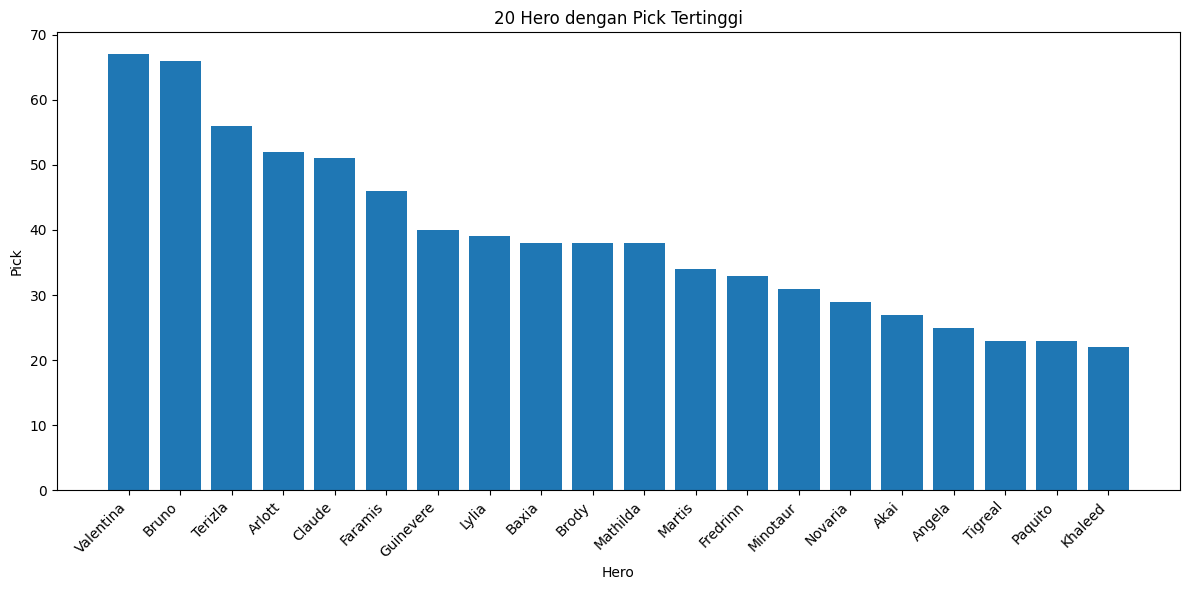

In [ ]:

import matplotlib.pyplot as plt

# Gantilah "df_hero" dengan nama DataFrame yang sesuai dengan struktur data Anda
# Pastikan untuk memasukkan nama DataFrame yang sebenarnya.
df_hero_pick = df_hero.sort_values(by=['Pick'], ascending=[False]).head(20)

# Menampilkan plot
plt.figure(figsize=(12, 6))
plt.bar(df_hero_pick['Hero'], df_hero_pick['Pick'])
plt.xlabel('Hero')
plt.ylabel('Pick')
plt.title('20 Hero dengan Pick Tertinggi')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis untuk keterbacaan yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()

### Hero paling sering di ban

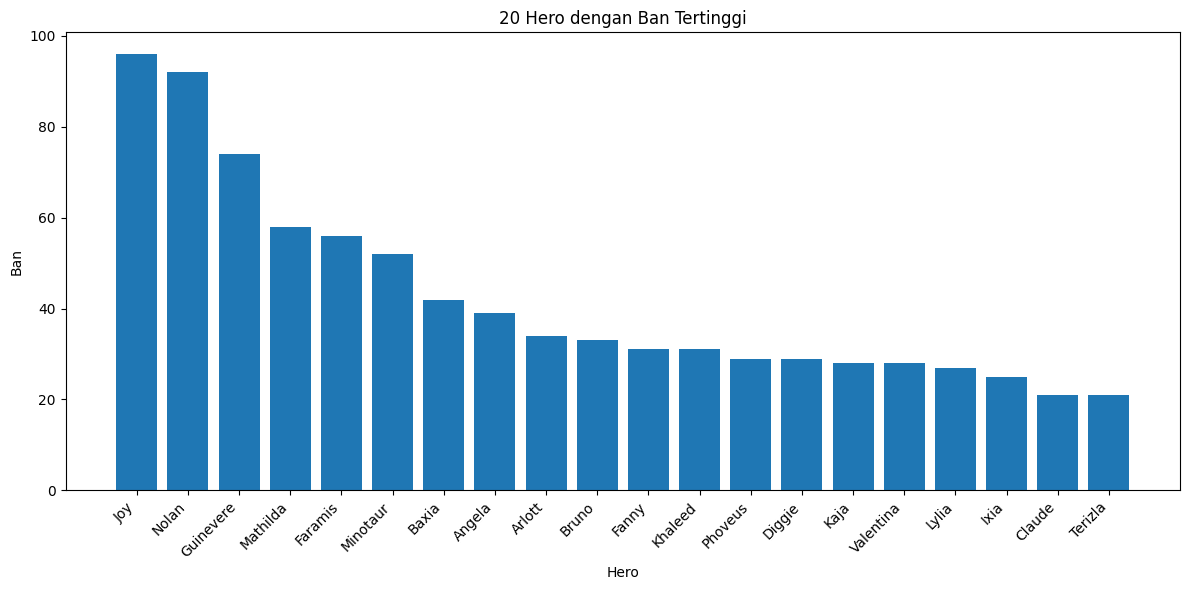

In [ ]:

# Gantilah "df_hero" dengan nama DataFrame yang sesuai dengan struktur data Anda
# Pastikan untuk memasukkan nama DataFrame yang sebenarnya.
df_hero_ban = df_hero.sort_values(by=['Ban'], ascending=[False]).head(20)

# Menampilkan plot
plt.figure(figsize=(12, 6))
plt.bar(df_hero_ban['Hero'], df_hero_ban['Ban'])
plt.xlabel('Hero')
plt.ylabel('Ban')
plt.title('20 Hero dengan Ban Tertinggi')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis untuk keterbacaan yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()

### Hero dengan win rate tertinggi

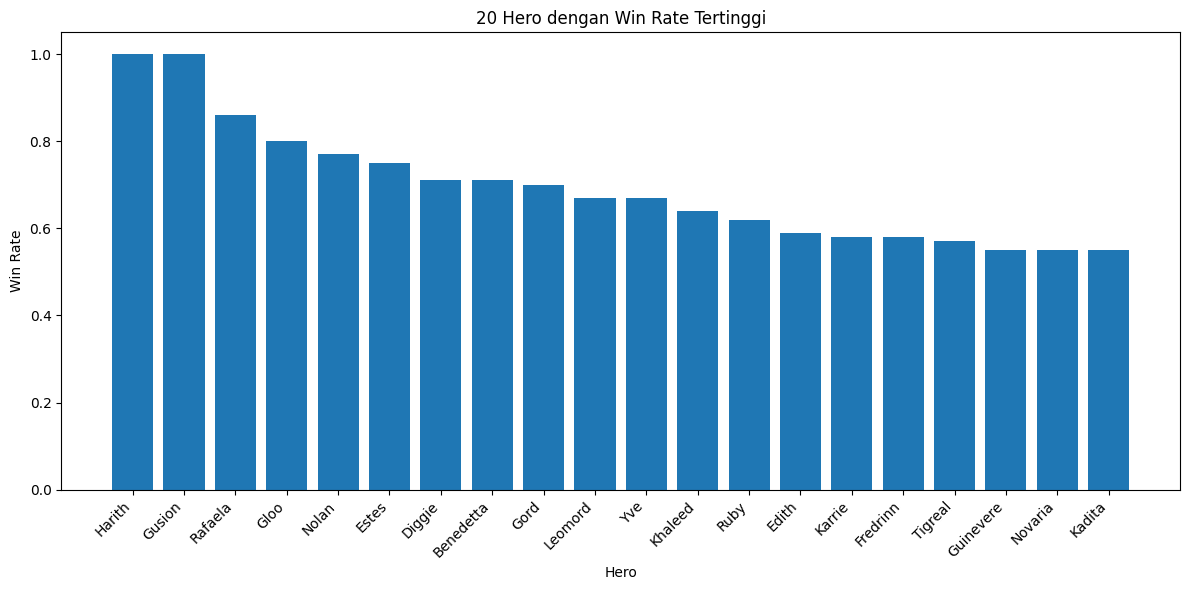

In [ ]:

# Gantilah "df_hero" dengan nama DataFrame yang sesuai dengan struktur data Anda
# Pastikan untuk memasukkan nama DataFrame yang sebenarnya.
df_hero_win = df_hero.sort_values(by=['Win Rate'], ascending=[False]).head(20)

# Menampilkan plot
plt.figure(figsize=(12, 6))
plt.bar(df_hero_win['Hero'], df_hero_win['Win Rate'])
plt.xlabel('Hero')
plt.ylabel('Win Rate')
plt.title('20 Hero dengan Win Rate Tertinggi')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis untuk keterbacaan yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()

Hero dengan Average KDA Tertinggi

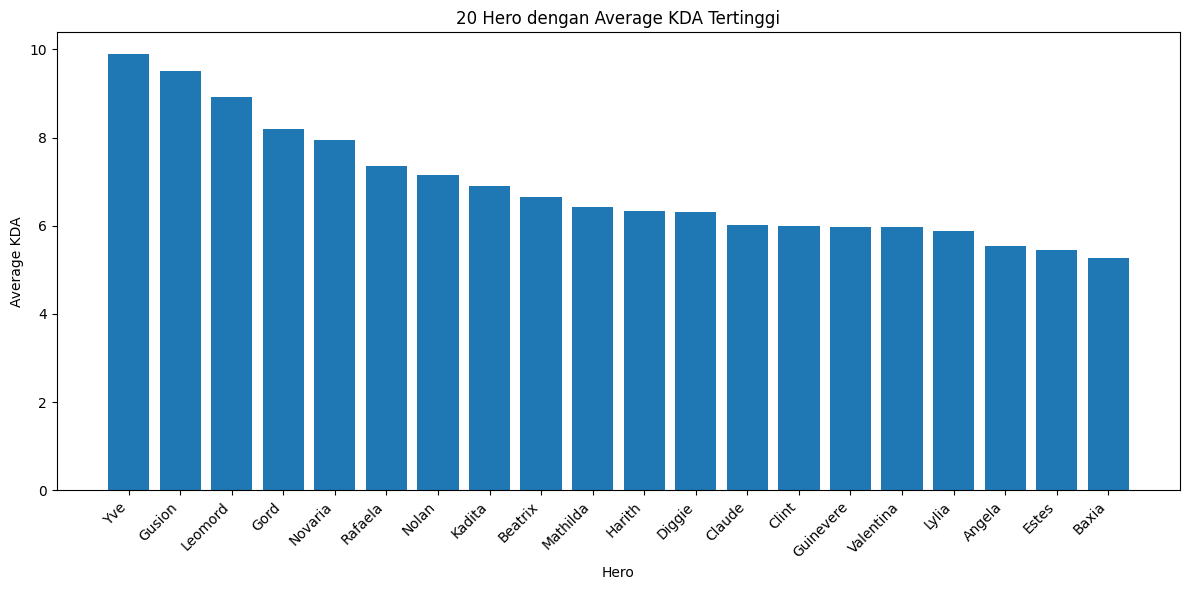

In [ ]:

# Gantilah "df_hero" dengan nama DataFrame yang sesuai dengan struktur data Anda
# Pastikan untuk memasukkan nama DataFrame yang sebenarnya.
df_hero_kda = df_hero.sort_values(by=['Average KDA'], ascending=[False]).head(20)

# Menampilkan plot
plt.figure(figsize=(12, 6))
plt.bar(df_hero_kda['Hero'], df_hero_kda['Average KDA'])
plt.xlabel('Hero')
plt.ylabel('Average KDA')
plt.title('20 Hero dengan Average KDA Tertinggi')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis untuk keterbacaan yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()

### Overall berdasarkan Pick, Win Rate, dan Average KDA

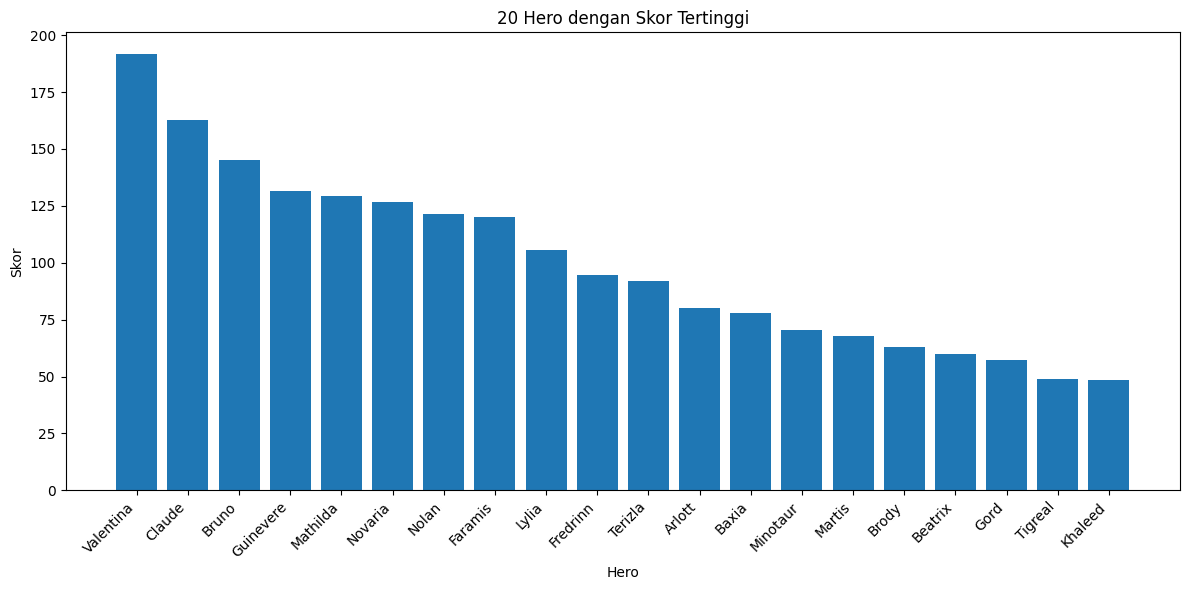

In [ ]:
df_hero['Skor'] = df_hero['Pick'] * df_hero['Win Rate'] * df_hero['Average KDA']

# Gantilah "df_hero" dengan nama DataFrame yang sesuai dengan struktur data Anda
# Pastikan untuk memasukkan nama DataFrame yang sebenarnya.
df_hero_skor = df_hero.sort_values(by=['Skor'], ascending=[False]).head(20)

# Menampilkan plot
plt.figure(figsize=(12, 6))
plt.bar(df_hero_skor['Hero'], df_hero_skor['Skor'])
plt.xlabel('Hero')
plt.ylabel('Skor')
plt.title('20 Hero dengan Skor Tertinggi')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis untuk keterbacaan yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()